In [6]:
# importiamo il dataset
import pandas as pd
path = r'C:\Users\deniz\Desktop\owid-covid-latest.csv'
df = pd.read_csv(path)

In [14]:
# Calcoliamo i casi totali per continente
casi_totali_per_continente = df.groupby('continent')['total_cases'].sum().reset_index()
casi_totali_per_continente = casi_totali_per_continente.sort_values(by='total_cases', ascending=False)
casi_totali_per_continente['total_cases'] = casi_totali_per_continente['total_cases'].astype(int)

#creiamo la tabella
casi_totali_per_continente.reset_index(drop=True, inplace=True)
casi_totali_per_continente.index = casi_totali_per_continente.index + 1
casi_totali_per_continente.columns = ['Continente', 'Casi Totali']

print(casi_totali_per_continente)

      Continente  Casi Totali
1           Asia    301499099
2         Europe    252916868
3  North America    124492666
4  South America     68809418
5        Oceania     15003352
6         Africa     13145380


In [40]:
continenti_da_confrontare = ['North America', 'South America']
casi_confronto = casi_totali_per_continente[casi_totali_per_continente['continent'].isin(continenti_da_confrontare)]

# Calcoliamo per nord e sud america il massimo di casi e la media
max_nord = casi_confronto[casi_confronto['continent'] == 'North America']['total_cases'].values[0]
max_sud = casi_confronto[casi_confronto['continent'] == 'South America']['total_cases'].values[0]

media_nord = casi_confronto[casi_confronto['continent'] == 'North America']['total_cases'].mean()
media_sud = casi_confronto[casi_confronto['continent'] == 'South America']['total_cases'].mean()

# calcoliamo il rapporto del mas
rapporto_max = max_nord / max_sud
rapporto_media = media_nord / media_sud

#calcoliamo la percentuale
casi_totali = casi_totali_per_continente['total_cases'].sum()
percentuale_nord = (casi_confronto[casi_confronto['continent'] == 'North America']['total_cases'].values[0] / casi_totali) * 100
percentuale_sud = (casi_confronto[casi_confronto['continent'] == 'South America']['total_cases'].values[0] / casi_totali) * 100

print(f"Valore massimo (Nord America): {max_nord}")
print(f"Valore massimo (Sud America): {max_sud}")
print(f"Rapporto massimo (Nord America / Sud America): {rapporto_max:.2f}")
print(f"Media (Nord America): {media_nord}")
print(f"Media (Sud America): {media_sud}")
print(f"Rapporto media (Nord America / Sud America): {rapporto_media:.2f}")
print(f"Percentuale casi totali (Nord America): {percentuale_nord:.2f}%")
print(f"Percentuale casi totali (Sud America): {percentuale_sud:.2f}%")

Valore massimo (Nord America): 124492666
Valore massimo (Sud America): 68809418
Rapporto massimo (Nord America / Sud America): 1.81
Media (Nord America): 124492666.0
Media (Sud America): 68809418.0
Rapporto media (Nord America / Sud America): 1.81
Percentuale casi totali (Nord America): 16.05%
Percentuale casi totali (Sud America): 8.87%


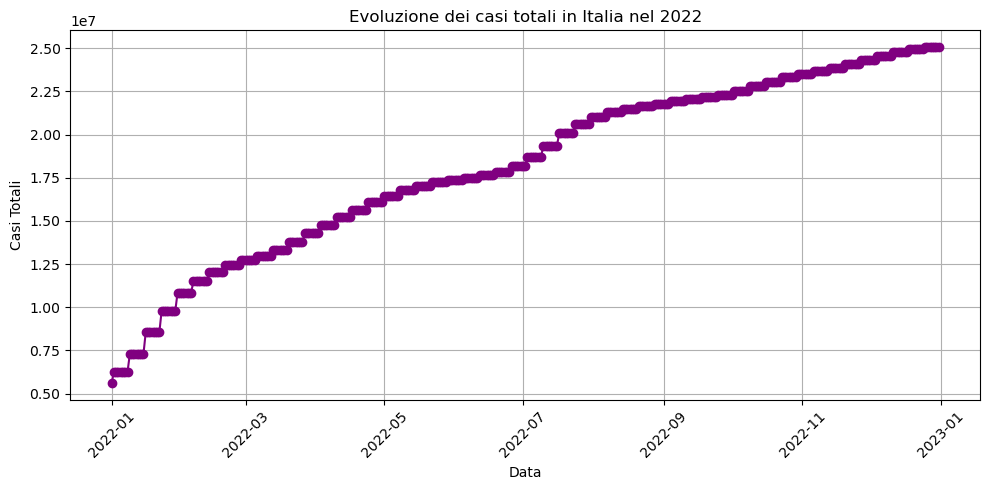

In [66]:
#carichiamo il file con tutti i dati assoluti
import pandas as pd
import matplotlib.pyplot as plt

path = r'C:\Users\deniz\Desktop\owid-covid-data.csv'
df = pd.read_csv(path)

# Filtriamo i dati per l'Italia nel anno 2022
df['date'] = pd.to_datetime(df['date'])
italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]
italia_2022 = italia_2022.sort_values(by='date')

# Creiamo il grafico 
plt.figure(figsize=(10,5))
plt.plot(italia_2022['date'], italia_2022['total_cases'], marker='o', linestyle='-', color='purple')  # Colore viola
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


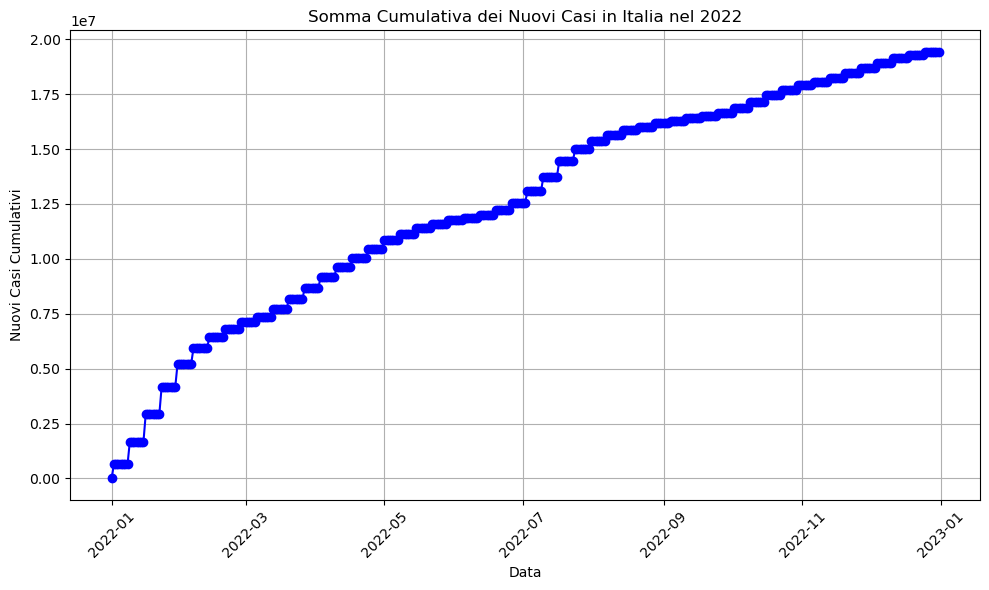

In [68]:
#copiamo il filtro fatto prima per i dati nel anno 2022 in Italia
df['date'] = pd.to_datetime(df['date'])
italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]
italia_2022 = italia_2022.sort_values(by='date')

#calcoliamo la somma cumulativa
italia_2022['new_cases'] = italia_2022['total_cases'].diff().fillna(0)
italia_2022['cumulative_new_cases'] = italia_2022['new_cases'].cumsum()

# Creiamo il grafico
plt.figure(figsize=(10,6))
plt.plot(italia_2022['date'], italia_2022['cumulative_new_cases'], marker='o', linestyle='-', color='blue')
plt.title('Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi Cumulativi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
# commento generale: In generale, i due grafici confermano l'andamento generale della pandemia, 
# ma il grafico della somma cumulativa dei nuovi casi fornisce una visione più dettagliata dell'accumulo nel tempo, 
# mentre il grafico dei casi totali offre una visione complessiva dell'andamento dell'epidemia.

In [ ]:
# ( il comento l'ho messo a capo cosi non devi scorere ed è più bello visivamente secondo me <3 )

C:\Users\deniz\AppData\Local\Temp\ipykernel_27800\2071762160.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['location'] = filtered_df['location'].replace({
C:\Users\deniz\AppData\Local\Temp\ipykernel_27800\2071762160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='location', y='icu_patients', palette='Set2')


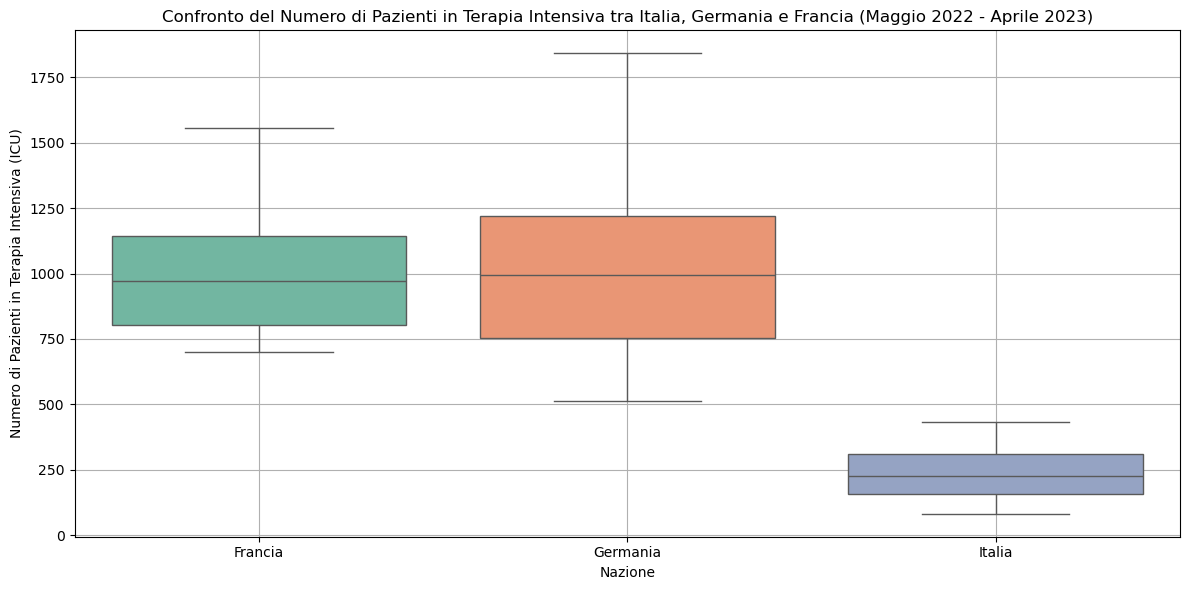

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'
filtered_df = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]
filtered_df['location'] = filtered_df['location'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'France': 'Francia'
})

# Creare il boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='location', y='icu_patients', palette='Set2')
plt.title('Confronto del Numero di Pazienti in Terapia Intensiva tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
# possiamo notare in questo grafico che nel arco di tempo che abbiamo preso in Italia il numero di pazienti che sono finiti in terapia intensiva sono circa 250 
# invece nelle altre due nazioni Francia e germania i pazienti in terapia intensiva si assestano sui 1000 una netta diferenza

In [107]:
import pandas as pd

# Assumendo che il DataFrame df sia già stato caricato e le colonne verificate

# Conversione della colonna 'date' in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrare i dati per Italia, Germania e Spagna e per l'anno 2023
countries = ['Italy', 'Germany', 'Spain']
start_date = '2023-01-01'
end_date = '2023-12-31'
filtered_df = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Modificare i nomi delle nazioni nel DataFrame
filtered_df['location'] = filtered_df['location'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'Spain': 'Spagna'
})

# Controllare se ci sono dati nulli nella colonna 'hosp_patients'
null_data = filtered_df['hosp_patients'].isnull().sum()
if null_data > 0:
    print(f"Ci sono {null_data} valori nulli nella colonna 'hosp_patients'.")

# Sommare i pazienti ospedalizzati per ogni nazione
sum_hospitalized = filtered_df.groupby('location')['hosp_patients'].sum().reset_index()

# Convertire i valori in interi
sum_hospitalized['hosp_patients'] = sum_hospitalized['hosp_patients'].astype(int)

# Rinomina le colonne per la visualizzazione
sum_hospitalized.columns = ['Nazione', 'Pazienti Ospedalizzati']

# Aggiungere un indice che inizia da 1
sum_hospitalized.index = sum_hospitalized.index + 1

print("Somma dei pazienti ospedalizzati per nazione nel 2023:")
print(sum_hospitalized)


Ci sono 568 valori nulli nella colonna 'hosp_patients'.
Somma dei pazienti ospedalizzati per nazione nel 2023:
    Nazione  Pazienti Ospedalizzati
1  Germania                       0
2    Italia                 1175272
3    Spagna                  354602


C:\Users\deniz\AppData\Local\Temp\ipykernel_27800\2892665688.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['location'] = filtered_df['location'].replace({


In [ ]:
# non abbiamo valori per la germania in questo campo quindi non possiamo determinare il numero di pazienti ospedalizati però si potrebbero aggiungere tranquillamente